# Import all the libraries needed

In [ ]:

import pandas as pd    # to load dataset
import numpy as np     # for mathematic equation
from nltk.corpus import stopwords   # to get collection of stopwords
from sklearn.model_selection import train_test_split       # for splitting dataset
from tensorflow.keras.preprocessing.text import Tokenizer  # to encode text to int
from tensorflow.keras.preprocessing.sequence import pad_sequences   # to do padding or truncating
from tensorflow.keras.models import Sequential     # the model
from tensorflow.keras.layers import Embedding, LSTM, Dense # layers of the architecture
from tensorflow.keras.callbacks import ModelCheckpoint   # save model
from tensorflow.keras.models import load_model   # load saved model
import re

# Import data

## Load data set

In [85]:
test_data = pd.read_csv("phm_test.csv")
train_data = pd.read_csv("phm_train.csv")

In [86]:
test_data.head(5)

,tweet_id,label,tweet
0,6.411550e+17,0,when you try to run away from the iv needle so...
1,6.425520e+17,1,i just knew i took an ambien for sleep too ear...
2,6.410410e+17,1,i mean i get that my celexa is the reason behi...
3,7.476620e+17,0,if you call me dumb or her dumb one more time ...
4,6.406830e+17,0,i do not want to go to the grocery store but i...


In [87]:
train_data.head(5)

,tweet_id,label,tweet
0,6.430000e+17,0,user_mention all i can tell you is i have had ...
1,6.440000e+17,0,my doctor told me stop he gave me sum pop i mi...
2,8.150000e+17,1,i take tylenol and i wake up in the middle of ...
3,6.820000e+17,0,i got xans in an advil bottle i dont take them...
4,6.440000e+17,1,mom says i need to stop eating so much bc ive ...


## Remove `tweet_id` column

In [88]:
test_data_new = test_data.drop(columns="tweet_id",axis=1)

In [89]:
train_data_new = train_data.drop(columns="tweet_id",axis=1)

In [90]:
test_data_new.head(5) , train_data_new.head(5)

(   label                                              tweet
 0      0  when you try to run away from the iv needle so...
 1      1  i just knew i took an ambien for sleep too ear...
 2      1  i mean i get that my celexa is the reason behi...
 3      0  if you call me dumb or her dumb one more time ...
 4      0  i do not want to go to the grocery store but i...,
    label                                              tweet
 0      0  user_mention all i can tell you is i have had ...
 1      0  my doctor told me stop he gave me sum pop i mi...
 2      1  i take tylenol and i wake up in the middle of ...
 3      0  i got xans in an advil bottle i dont take them...
 4      1  mom says i need to stop eating so much bc ive ...)

In [91]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
english_stops = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\Induwara
[nltk_data]     Dilshan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# PRE-PROCESS

In [92]:
def load_dataset_train():
    x_data_train = train_data_new['tweet']       # Reviews/Input
    y_data_train = train_data_new['label']    # Sentiment/Output


    # PRE-PROCESS REVIEW
    x_data_train = x_data_train.replace({'<.*?>': ''}, regex = True)          # remove html tag
    x_data_train = x_data_train.replace({'[^A-Za-z]': ' '}, regex = True)     # remove non alphabet
    x_data_train = x_data_train.apply(lambda review: [w for w in review.split() if w not in english_stops])  # remove stop words
    x_data_train = x_data_train.apply(lambda review: [w.lower() for w in review])   # lower case

    return x_data_train, y_data_train

x_data_train, y_data_train = load_dataset_train()

print('tweet')
print(x_data_train, '\n')
print('label')
print(y_data_train)

tweet
0       [user, mention, tell, relapses, cure, hear, do...
1       [doctor, told, stop, gave, sum, pop, mix, w, a...
2       [take, tylenol, wake, middle, night, put, ice,...
3       [got, xans, advil, bottle, dont, take, shits, ...
4       [mom, says, need, stop, eating, much, bc, ive,...
                              ...                        
9986                                    [vicodin, messed]
9987                   [user, mention, get, tylenol, lol]
9988                         [like, walking, tamiflu, ad]
9989                              [klay, steph, steroids]
9990                [horrible, pops, another, xanax, url]
Name: tweet, Length: 9991, dtype: object 

label
0       0
1       0
2       1
3       0
4       1
       ..
9986    1
9987    0
9988    0
9989    0
9990    0
Name: label, Length: 9991, dtype: int64


In [93]:
def load_dataset_test():
    x_data_test = test_data_new['tweet']       # Reviews/Input
    y_data_test = test_data_new['label']    # Sentiment/Output


    # PRE-PROCESS REVIEW
    x_data_test = x_data_test.replace({'<.*?>': ''}, regex = True)          # remove html tag
    x_data_test = x_data_test.replace({'[^A-Za-z]': ' '}, regex = True)     # remove non alphabet
    x_data_test = x_data_test.apply(lambda review: [w for w in review.split() if w not in english_stops])  # remove stop words
    x_data_test = x_data_test.apply(lambda review: [w.lower() for w in review])   # lower case

    return x_data_test, y_data_test

x_data_test, y_data_test = load_dataset_test()

print('tweet')
print(x_data_test, '\n')
print('label')
print(y_data_test)

tweet
0       [try, run, away, iv, needle, doctor, drug, w, ...
1       [knew, took, ambien, sleep, early, im, ready, ...
2       [mean, get, celexa, reason, behind, lot, weigh...
3       [call, dumb, dumb, one, time, dont, care, many...
4       [want, go, grocery, store, cant, pay, anyone, ...
                              ...                        
3326                           [fina, take, xanax, knock]
3327               [user, mention, yr, citalopram, right]
3328              [user, mention, yeah, im, going, norco]
3329              [user, mention, tylenol, w, codin, lol]
3330                [thats, determination, steroids, url]
Name: tweet, Length: 3331, dtype: object 

label
0       0
1       1
2       1
3       0
4       0
       ..
3326    0
3327    0
3328    0
3329    0
3330    0
Name: label, Length: 3331, dtype: int64


# train and test split

In [94]:
x_train = x_data_train
y_train = y_data_train
x_test = x_data_test
y_test = y_data_test

In [95]:
print("x train ")
print(x_train)

print("x test")
print(x_test,"\n")

print("y_train")
print(y_train,"\n")

print("y test")
print(y_test)

x train 
0       [user, mention, tell, relapses, cure, hear, do...
1       [doctor, told, stop, gave, sum, pop, mix, w, a...
2       [take, tylenol, wake, middle, night, put, ice,...
3       [got, xans, advil, bottle, dont, take, shits, ...
4       [mom, says, need, stop, eating, much, bc, ive,...
                              ...                        
9986                                    [vicodin, messed]
9987                   [user, mention, get, tylenol, lol]
9988                         [like, walking, tamiflu, ad]
9989                              [klay, steph, steroids]
9990                [horrible, pops, another, xanax, url]
Name: tweet, Length: 9991, dtype: object
x test
0       [try, run, away, iv, needle, doctor, drug, w, ...
1       [knew, took, ambien, sleep, early, im, ready, ...
2       [mean, get, celexa, reason, behind, lot, weigh...
3       [call, dumb, dumb, one, time, dont, care, many...
4       [want, go, grocery, store, cant, pay, anyone, ...
               

In [96]:
#Function for getting the maximum review length, by calculating the mean of all the reviews length (using numpy.mean)
def get_max_length():
    tweet_length = []
    for tweet in x_train:
        tweet_length.append(len(tweet))

    return int(np.ceil(np.mean(tweet_length)))

In [97]:
print(get_max_length())

10


In [98]:
#Tokenize and Pad/Truncate Reviews
#post, pad or truncate the words in the back of a sentence
#pre, pad or truncate the words in front of a sentence

# ENCODE REVIEW
token = Tokenizer(lower=False)    # no need lower, because already lowered the data in load_data()
token.fit_on_texts(x_train)
x_train = token.texts_to_sequences(x_train)
x_test = token.texts_to_sequences(x_test)

max_length = get_max_length()

x_train = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')

total_words = len(token.word_index) + 1   # add 1 because of 0 padding

print('Encoded X Train\n', x_train, '\n')
print('Encoded X Test\n', x_test, '\n')
print('Maximum review length: ', max_length)

Encoded X Train
 [[    2     1   200 ...   944  3624  1952]
 [  115   122   147 ...   193    40   322]
 [    6     3   330 ...   626  1710    29]
 ...
 [    7   529  1739 ...     0     0     0]
 [12658 12659     8 ...     0     0     0]
 [  645  1436   174 ...     0     0     0]] 

Encoded X Test
 [[  98  606  109 ...  193    4  318]
 [ 585   11   56 ...   16  707   55]
 [ 327   12 1209 ...  778    5   88]
 ...
 [   2    1  126 ...    0    0    0]
 [   2    1    3 ...    0    0    0]
 [  59    8    9 ...    0    0    0]] 

Maximum review length:  10


In [99]:
# ARCHITECTURE
EMBED_DIM = 32
LSTM_OUT = 64

model = Sequential()
model.add(Embedding(total_words, EMBED_DIM, input_shape=(max_length,)))
model.add(LSTM(LSTM_OUT))
model.add(Dense(1, activation='sigmoid'))

# Compile the model to build it
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

print(model.summary())

c:\Users\Induwara Dilshan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ (None, 10, 32)         │       405,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 430,017 (1.64 MB)

 Trainable params: 430,017 (1.64 MB)

 Non-trainable params: 0 (0.00 B)

None


# Model Training

In [100]:
checkpoint = ModelCheckpoint(
    'models/LSTM.keras',
    monitor='accuracy',
    save_best_only=True,
    verbose=1
)

In [101]:
model.fit(x_train, y_train, batch_size = 128, epochs = 5, callbacks=[checkpoint])

Epoch 1/5
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6952 - loss: 0.6193
Epoch 1: accuracy improved from -inf to 0.73236, saving model to models/LSTM.keras
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6961 - loss: 0.6179
Epoch 2/5
76/79 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8324 - loss: 0.3827
Epoch 2: accuracy improved from 0.73236 to 0.83845, saving model to models/LSTM.keras
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8327 - loss: 0.3821
Epoch 3/5
77/79 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8909 - loss: 0.2761
Epoch 3: accuracy improved from 0.83845 to 0.88420, saving model to models/LSTM.keras
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8906 - loss: 0.2763
Epoch 4/5
75/79 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9168 - loss: 0.2282
Epoch 4: accuracy improved from 0.88420 to 0.91232, saving model to models/LSTM.keras
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9165 - loss: 0.2281
Epoch 5/5
77/79 ━━━━━━━━━━━

# Model testing

In [102]:
pred = model.predict(x=x_test)
y_pred = (pred >= 0.5) * 1

#y_pred = model.predict(x_test)

true = 0
for i, y in enumerate(y_test):
    if y == y_pred[i]:
        true += 1


print('Correct Prediction: {}'.format(true))
print('Wrong Prediction: {}'.format(len(y_pred) - true))
print('Accuracy: {}'.format(true/len(y_pred)*100))

105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Correct Prediction: 2686
Wrong Prediction: 645
Accuracy: 80.6364455118583


# Improve model Accuracy

* Adding dropout : working
* Adding Dense layer : NOT working
* Adding Dropout layer : NOT working
* Adding more LSTM layer : NOT working
* changing adam learning rate : NOT working
* changing number of epochs : NOT working 

### Again code

In [103]:
from tensorflow.keras.layers import Dropout

In [104]:
# ARCHITECTURE
EMBED_DIM = 32
LSTM_OUT = 64

model_1 = Sequential()
model_1.add(Embedding(total_words, EMBED_DIM, input_shape=(max_length,)))
model_1.add(LSTM(LSTM_OUT,dropout=0.2))
model_1.add(Dense(1, activation='sigmoid'))

# Compile the model to build it
model_1.compile(optimizer= "adam", 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

print(model_1.summary())

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (None, 10, 32)         │       405,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 430,017 (1.64 MB)

 Trainable params: 430,017 (1.64 MB)

 Non-trainable params: 0 (0.00 B)

None


In [105]:
checkpoint = ModelCheckpoint(
    'model_1/LSTM.keras',
    monitor='accuracy',
    save_best_only=True,
    verbose=1
)

In [106]:
history_1 = model_1.fit(x_train, y_train, batch_size = 128, epochs = 5, callbacks=[checkpoint])

Epoch 1/5
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7010 - loss: 0.6264
Epoch 1: accuracy improved from -inf to 0.72695, saving model to model_1/LSTM.keras
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.7017 - loss: 0.6250
Epoch 2/5
75/79 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8293 - loss: 0.3992
Epoch 2: accuracy improved from 0.72695 to 0.83195, saving model to model_1/LSTM.keras
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8295 - loss: 0.3984
Epoch 3/5
75/79 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8774 - loss: 0.2959
Epoch 3: accuracy improved from 0.83195 to 0.87349, saving model to model_1/LSTM.keras
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8772 - loss: 0.2961
Epoch 4/5
76/79 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9004 - loss: 0.2513
Epoch 4: accuracy improved from 0.87349 to 0.90311, saving model to model_1/LSTM.keras
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9006 - loss: 0.2507
Epoch 5/5
79/79 ━━━━━━━

In [107]:
pred = model_1.predict(x=x_test)
y_pred = (pred >= 0.5) * 1

# y_pred = model.predict(x_test)

true = 0
for i, y in enumerate(y_test):
    if y == y_pred[i]:
        true += 1


print('Correct Prediction: {}'.format(true))
print('Wrong Prediction: {}'.format(len(y_pred) - true))
print('Accuracy: {}'.format(true/len(y_pred)*100))

105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Correct Prediction: 2694
Wrong Prediction: 637
Accuracy: 80.87661362954069


# Using  `Bi-LSTM model`

In [108]:
from tensorflow.keras.layers import Bidirectional

In [109]:
# ARCHITECTURE
EMBED_DIM = 32
LSTM_OUT = 64

model_bi_LSTM = Sequential()
model_bi_LSTM.add(Embedding(total_words, EMBED_DIM, input_shape=(max_length,)))
model_bi_LSTM.add(Bidirectional(LSTM(LSTM_OUT,dropout = 0.2)))
model_bi_LSTM.add(Dense(1, activation='sigmoid'))

# Compile the model to build it
model_bi_LSTM.compile(optimizer= "adam", 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

print(model_bi_LSTM.summary())

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ (None, 10, 32)         │       405,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 128)            │        49,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 454,913 (1.74 MB)

 Trainable params: 454,913 (1.74 MB)

 Non-trainable params: 0 (0.00 B)

None


In [110]:
checkpoint = ModelCheckpoint(
    'model_bi_LSTM/LSTM.keras',
    monitor='accuracy',
    save_best_only=True,
    verbose=1
)

In [111]:
history_2 = model_bi_LSTM.fit(x_train, y_train, batch_size = 128, epochs = 5, callbacks=[checkpoint])

Epoch 1/5
77/79 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7101 - loss: 0.6122
Epoch 1: accuracy improved from -inf to 0.73806, saving model to model_bi_LSTM/LSTM.keras
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7112 - loss: 0.6099
Epoch 2/5
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8422 - loss: 0.3668
Epoch 2: accuracy improved from 0.73806 to 0.84266, saving model to model_bi_LSTM/LSTM.keras
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8423 - loss: 0.3667
Epoch 3/5
77/79 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8853 - loss: 0.2770
Epoch 3: accuracy improved from 0.84266 to 0.88249, saving model to model_bi_LSTM/LSTM.keras
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8852 - loss: 0.2772
Epoch 4/5
77/79 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9187 - loss: 0.2138
Epoch 4: accuracy improved from 0.88249 to 0.91122, saving model to model_bi_LSTM/LSTM.keras
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9184 - loss: 0.2142

In [112]:
pred = model_bi_LSTM.predict(x=x_test)
y_pred = (pred >= 0.5) * 1

#y_pred = model.predict(x_test)

true = 0
for i, y in enumerate(y_test):
    if y == y_pred[i]:
        true += 1


print('Correct Prediction: {}'.format(true))
print('Wrong Prediction: {}'.format(len(y_pred) - true))
print('Accuracy: {}'.format(true/len(y_pred)*100))

105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Correct Prediction: 2678
Wrong Prediction: 653
Accuracy: 80.39627739417593


# Accuracy and loss plot of `model_1 and model_bi_LSTM`

In [116]:
lstm_loss, lstm_accuracy = model_1.evaluate(x_test, y_test)

bilstm_loss, bilstm_accuracy = model_bi_LSTM.evaluate(x_test, y_test)

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7858 - loss: 0.5756
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7867 - loss: 0.6264


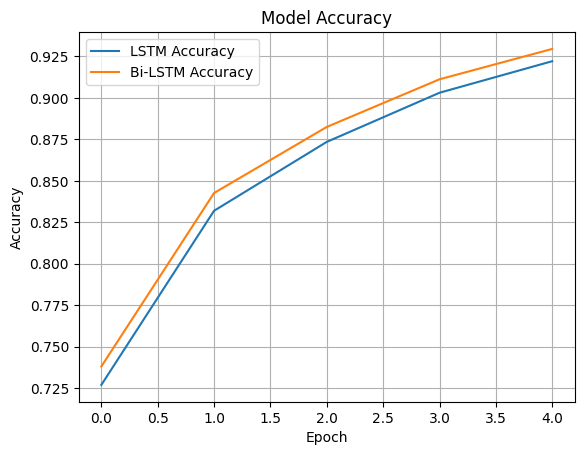

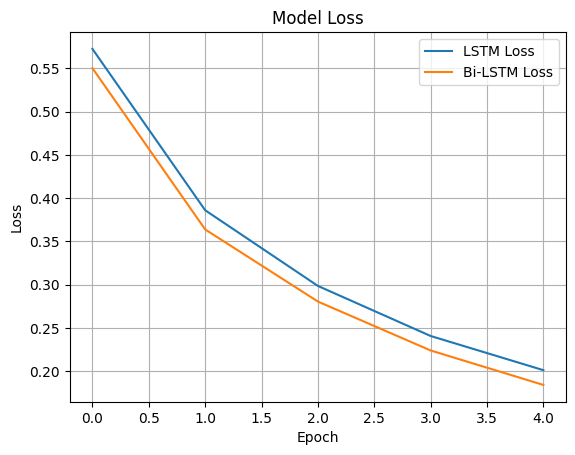

In [113]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.plot(history_1.history['accuracy'], label='LSTM Accuracy')
plt.plot(history_2.history['accuracy'], label='Bi-LSTM Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.plot(history_1.history['loss'], label='LSTM Loss')
plt.plot(history_2.history['loss'], label='Bi-LSTM Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()